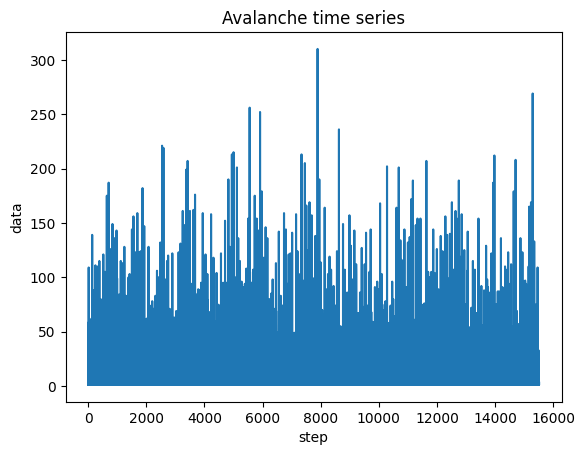

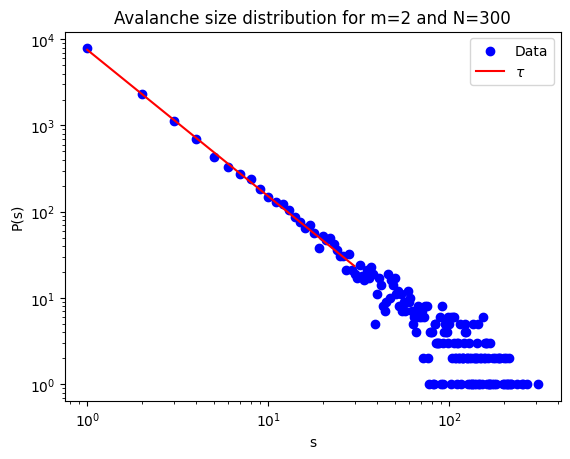

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from main_numpy import NeuronModel



if __name__ == '__main__':
    ba_network = nx.barabasi_albert_graph(400, 2, seed=None, initial_graph=None)
    ba_network.add_node(-1)  # Adding the sink node

    p = 0.5  # Probability of adding an edge to the sink

# Iterate over each node (not the sink node)
    for node in ba_network.nodes():
        if node != -1:
            if np.random.random() < p:
                ba_network.add_edge(node, -1)

    model = NeuronModel(ba_network, sample_delay=10000, start_filled=False)
    data = np.array(model.run(50000))
    values, counts = np.unique(data, return_counts=True)
    
##Plots:    

#Function to get linear fit 
    def lin_fit(x, a, b):
        return a * x + b
    
#1. Avalanche size time series 
    plt.title("Avalanche time series")
    plt.plot(data)
    plt.xlabel("step")
    plt.ylabel("data")
    #plt.savefig("")
    plt.show()

    
#2. Avalanche size distribution for m = 2

# Perform the fit on log-transformed data
    log_values = np.log10(values[0:30])
    log_counts = np.log10(counts[0:30])
    param, param_cov = curve_fit(lin_fit, log_values, log_counts)
    #print("exponent =", param[0], "for m=2 and N=20")
    
    #Generate the fit values
    fit_values = param[0] * log_values + param[1]

# Plot
    plt.title("Avalanche size distribution for m=2 and N=300")
    plt.scatter(values, counts, color='blue', label='Data')
    plt.plot(values[0:30],np.power(10, fit_values), color='red', label=r'$\tau$')  # Convert back to original scale
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("s")
    plt.ylabel("P(s)")
    plt.legend()
    plt.show()

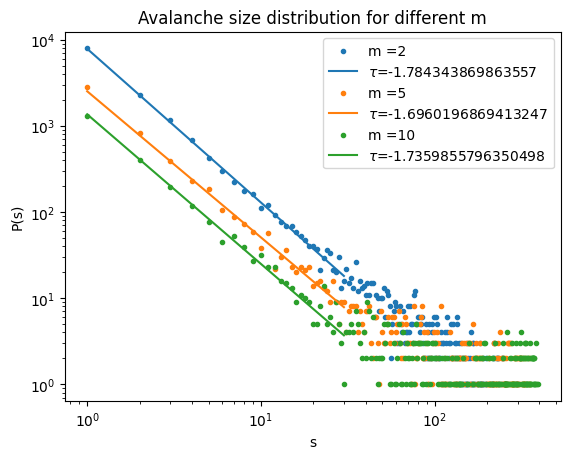

In [15]:
#3. Avalanche size distribution for varying parameter m ()
if __name__ == '__main__':
    m = [2,5,10]
    
    plt.title("Avalanche size distribution for different m")
    for i in range(len(m)): #go through the list to get different m
        ba_network = nx.barabasi_albert_graph(400, m[i], seed=None, initial_graph=None)
        ba_network.add_node(-1)  # Adding the sink node

        p = 0.5  # Probability of adding an edge to the sink

# Iterate over each node (not the sink node)
        for node in ba_network.nodes():
            if node != -1:
                if np.random.random() < p:
                    ba_network.add_edge(node, -1)

        model = NeuronModel(ba_network, sample_delay=10000, start_filled=False)
        data = np.array(model.run(50000))
        values, counts = np.unique(data, return_counts=True)
        
# Perform the fit on log-transformed data
        log_values = np.log10(values[0:30])
        log_counts = np.log10(counts[0:30])
        param, param_cov = curve_fit(lin_fit, log_values, log_counts)
        #print("exponent =", param[0], "for m=2 and N=20")
    
    #Generate the fit values
        fit_values = param[0] * log_values + param[1]

# Plot
       
        #Plot avalanche distribution for specific m parameter
        plt.scatter(values, counts, marker='.',label="m ="+str(m[i]))
        plt.plot(values[0:30],np.power(10, fit_values), label=r'$\tau$='+str(param[0]))
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel("s")
        plt.ylabel("P(s)")
        plt.legend()
    plt.savefig("BA_m")
    plt.show()

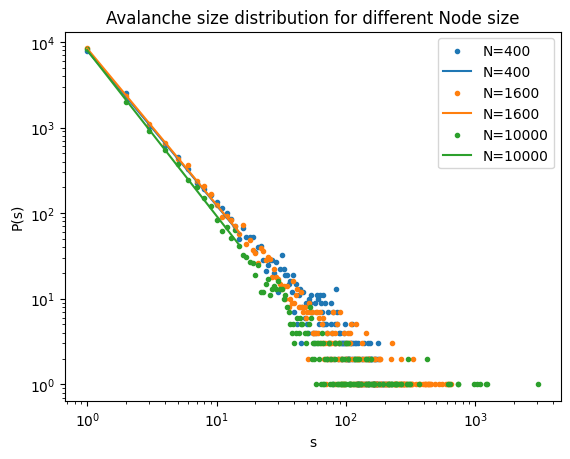

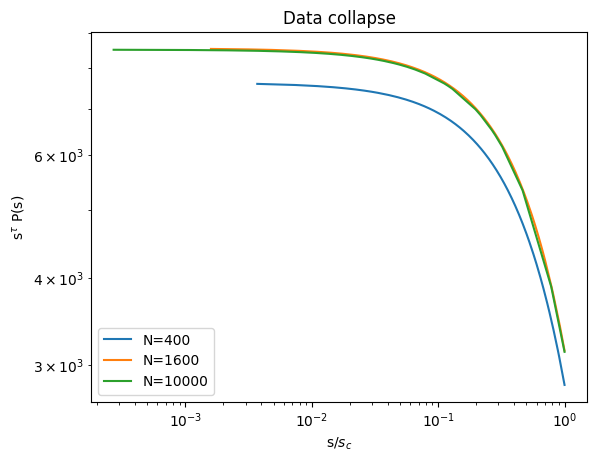

In [18]:
#4. Avalanche size distribution for varying Node numbers ()
if __name__ == '__main__':
    N = [400,1600,10000] #Keep in mind the problem with N=5000
    
    plt.title("Avalanche size distribution for different Node size")
    for i in range(len(N)): #go through the list to get different N
        
        #Extract Data
        ba_network = nx.barabasi_albert_graph(N[i],m=2, seed=None, initial_graph=None)
        ba_network.add_node(-1)  # Adding the sink node

        p = 0.5  # Probability of adding an edge to the sink

        # Iterate over each node (not the sink node)
        for node in ba_network.nodes():
            if node != -1:
                if np.random.random() < p:
                    ba_network.add_edge(node, -1)

        model = NeuronModel(ba_network, sample_delay=10000, start_filled=False)
        data = np.array(model.run(50000))
        values, counts = np.unique(data, return_counts=True)
        
        
        # Perform the fit on log-transformed data
        log_values = np.log10(values[0:15])
        log_counts = np.log10(counts[0:15])

        param, param_cov = curve_fit(lin_fit, log_values, log_counts)
        #print("exponent =", param[0])
        
        #Generate the fit values
        fit_values = param[0] * np.log10(values) + param[1]

        #Plot avalanche distribution for specific N
        plt.scatter(values, counts, marker='.',label="N="+str(N[i]))
        plt.plot(values[0:15], np.power(10, fit_values[0:15])*np.exp(-values[0:15]/max(values)),label="N="+str(N[i]))
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel("s")
        plt.ylabel("P(s)")
        plt.legend()              
    plt.savefig("BA_N")
    plt.show()

#5. Avalanche size distribution with data collapse
    plt.title("Data collapse")
    for i in range(len(N)):
        
        #Extract Data
        ba_network = nx.barabasi_albert_graph(N[i],m=2, seed=None, initial_graph=None)
        ba_network.add_node(-1)  # Adding the sink node

        p = 0.5  # Probability of adding an edge to the sink

        # Iterate over each node (not the sink node)
        for node in ba_network.nodes():
            if node != -1:
                if np.random.random() < p:
                    ba_network.add_edge(node, -1)

        model = NeuronModel(ba_network, sample_delay=10000, start_filled=False)
        data = np.array(model.run(50000))
        values, counts = np.unique(data, return_counts=True)
        
        # Perform the fit on log-transformed data
        log_values = np.log10(values[0:10])
        log_counts = np.log10(counts[0:10])
        param, param_cov = curve_fit(lin_fit, log_values, log_counts)
        #print("exponent =", param[0])
        
        #Generate the fit values
        fit_values = param[0] * np.log10(values) + param[1]
        #Plot avalanche distribution collapse
        
        #plt.scatter(values/N[i], counts, marker='.',label="N="+str(N[i]))
        plt.plot(values/max(values),(values**-param[0])*(np.power(10, fit_values)*np.exp(-values/max(values))),label="N="+str(N[i]))
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel(r"s/$s_c$")
        plt.ylabel(r"s$^\tau$ P(s)")
        plt.legend()
    plt.savefig("Data collapse")
    plt.show()